In [2]:
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.ion()

In [3]:
def load_data(file):
    data = np.loadtxt(file, delimiter=",")

    exit_data = data.copy()
    exit_data[exit_data != 0] = np.nan

    blocked_data = data.copy()
    blocked_data[blocked_data >= 0] = np.nan

    data[data < 0] = np.nan
    return data, exit_data, blocked_data

In [4]:
def plot_distance_map(data, exit_data, blocked_data):
    blocked_cmap = ListedColormap([(0, 0, 0, 1)])
    blocked_cmap.set_bad(color="none")

    exit_cmap = ListedColormap([(1, 1, 1, 1)])
    exit_cmap.set_bad(color="none")

    plt.figure(figsize=(10, 10))
    # Change figure size as needed
    plt.imshow(data, cmap="jet", interpolation="none")
    plt.colorbar()  # Adds a color bar to the side

    plt.imshow(exit_data, cmap=exit_cmap, interpolation="none")
    plt.imshow(blocked_data, cmap=blocked_cmap, interpolation="none")

    plt.show()

In [5]:
%matplotlib

folder = pathlib.Path("/home/tobias/dev/simulex/Simulex/example models/")
file = folder / "dump.csv"

data_simulex, exit_data_simulex, blocked_data_simulex = load_data(file)
plot_distance_map(data_simulex, exit_data_simulex, blocked_data_simulex)

Using matplotlib backend: <object object at 0x7f4200f5b400>


In [6]:
data_simulex.shape

(473, 526)

In [71]:
np.nanmax(data_simulex)

7477.0

# Debugging Jette

In [37]:
%matplotlib

folder = pathlib.Path("/home/tobias/dev/jupedsim/simulations/routing-issue/")

for file in folder.glob("*06.csv"):
    print(file)
    data, exit_data, blocked_data = load_data(file)
    plot_distance_map(data, exit_data, blocked_data)

Using matplotlib backend: QtAgg
/home/tobias/dev/jupedsim/simulations/routing-issue/dump_06.csv


/tmp/ipykernel_349117/3695858448.py:1: RuntimeWarning: Mean of empty slice
  np.nanmean(data)


nan

In [36]:
%matplotlib

plt.imshow(data - data_simulex, cmap="jet", interpolation="none", origin="lower")
plt.colorbar()  # Adds a color bar to the side
plt.show()

Using matplotlib backend: QtAgg


In [32]:
np.nanmax(data - data_simulex)

/tmp/ipykernel_349117/3855569825.py:1: RuntimeWarning: All-NaN slice encountered
  np.nanmax(data - data_simulex)


nan

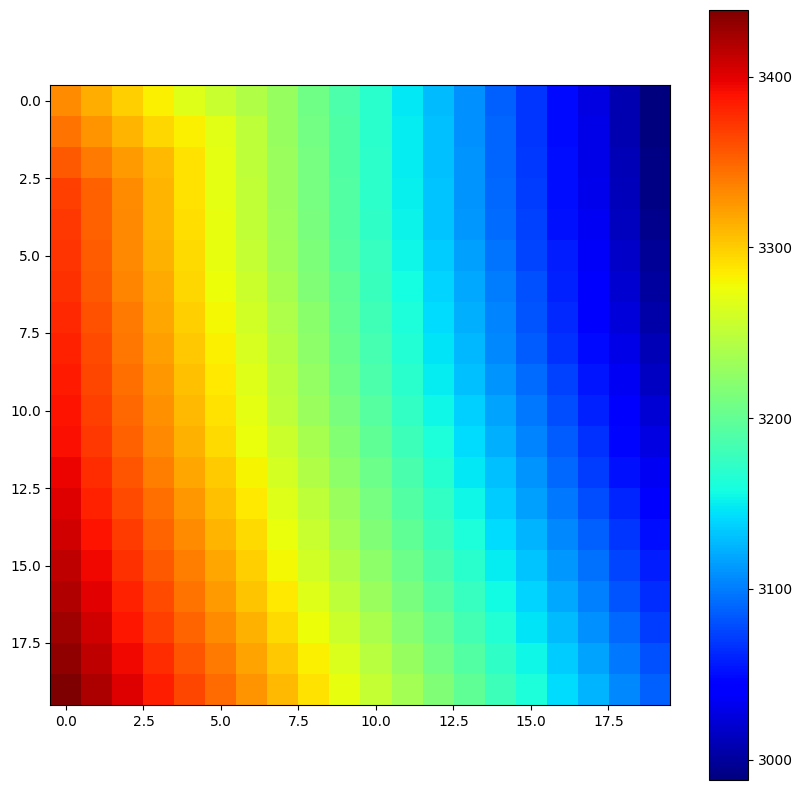

In [19]:
window = 10
center = (243, 213)

plot_distance_map(
    data[
        center[0] - window : center[0] + window,
        center[1] - window : center[1] + window,
    ],
    exit_data[
        center[0] - window : center[0] + window,
        center[1] - window : center[1] + window,
    ],
    blocked_data[
        center[0] - window : center[0] + window,
        center[1] - window : center[1] + window,
    ],
)
# plot_distance_map(

# )

In [18]:
loaded_data[1][243, 213]

nan

In [ ]:
print()

In [17]:
print(
    "   x      x      x      x      x      x      x    420    408    402    400    402    395      x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    381    368    362    360    362    371      x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    342    329    322    320    323    335      x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    303    290    282    280    283    308      x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    265    250    243    240    244      x      x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    228    212    203    200    205      x      x      x      x      x      x      x      x      x   \n 391    357    323    293    268      x    211    191    173    163    160    167      x      x      x      x      x      x      x      x      x   \n 373    338    303    268    238    209    181    157    137    124    120    131      x      x      x      x      x      x      x      x      x   \n 357    320    285    250    214    184    153    126    103     87     80    105      x      x      x      x      x      x      x      x      x   \n 344    307    270    233    198    162    130    100     73     50     40      x      x      x      x      x      x      x      x      x      x   \n 335    297    258    221    184    148    112     80     49     22     0       x      x      x      x      x      x      x      x      x      x   \n 329    290    252    213    176    139    102     67     37     11     0       x      x      x      x      x      x      x      x      x      x   \n 328    288    249    211    172    136     98     64     33     10     0       x      x      x      x      x      x      x      x      x      x   \n 329    291    252    213    176    139    102     68     37     11     0       x      x      x      x      x      x      x      x      x      x   \n 332    294    257    219    182    147    112     79     49     22     0     -17    -30    -38    -43    -45    -37      x      x      x      x   \n 338    300    263    227    191    156    124     93     64     39     17      x    -14    -25    -34    -40    -45    -49    -51    -53    -53   \n 343    307    271    235    202    168    136    107     79     55     34     16     0     -11    -21    -29    -34    -40    -44    -47    -50   \n 351    315    281    246    212    181    150    121     96     71     50     32     17     3      -7    -16    -24    -29    -34    -39    -42   \n 360    325    290    258    225    194    165    137    111     88     67     48     33     19     7       -    -11    -18    -24    -29    -34   \n 369    336    302    269    238    208    179    153    127    104     84     65     48     35     22     11     2      -6    -13    -18    -24   \n 380    346    314    282    251    223    194    168    144    121    100     82     65     50     37     26     15     7       x     -8    -13   \n\n"
)

   x      x      x      x      x      x      x    420    408    402    400    402    395      x      x      x      x      x      x      x      x   
   x      x      x      x      x      x      x    381    368    362    360    362    371      x      x      x      x      x      x      x      x   
   x      x      x      x      x      x      x    342    329    322    320    323    335      x      x      x      x      x      x      x      x   
   x      x      x      x      x      x      x    303    290    282    280    283    308      x      x      x      x      x      x      x      x   
   x      x      x      x      x      x      x    265    250    243    240    244      x      x      x      x      x      x      x      x      x   
   x      x      x      x      x      x      x    228    212    203    200    205      x      x      x      x      x      x      x      x      x   
 391    357    323    293    268      x    211    191    173    163    160    167      x      x      x      x   

# Debugging JuPedSim

In [67]:
import pandas as pd
import numpy as np

np.set_printoptions(linewidth=np.inf)


def print_stencil(stencil):
    for row in stencil:
        print("\t".join(map(str, row)))

In [45]:
local_distance_str = "283    269    256    244    233    224    215    209    204    201    200    201    204    209    215    224    233    244    256    269    283   \n 269    255    241    228    216    206    197    190    184    181    180    181    184    190    197    206    216    228    241    255    269   \n 256    241    226    213    200    189    179    171    165    161    160    161    165    171    179    189    200    213    226    241    256   \n 244    228    213    198    184    172    161    152    146    141    140    141    146    152    161    172    184    198    213    228    244   \n 233    216    200    184    170    156    144    134    126    122    120    122    126    134    144    156    170    184    200    216    233   \n 224    206    189    172    156    141    128    117    108    102    100    102    108    117    128    141    156    172    189    206    224   \n 215    197    179    161    144    128    113    100     89     82     80     82     89    100    113    128    144    161    179    197    215   \n 209    190    171    152    134    117    100     85     72     63     60     63     72     85    100    117    134    152    171    190    209   \n 204    184    165    146    126    108     89     72     57     45     40     45     57     72     89    108    126    146    165    184    204   \n 201    181    161    141    122    102     82     63     45     28     20     28     45     63     82    102    122    141    161    181    201   \n 200    180    160    140    120    100     80     60     40     20     0      20     40     60     80    100    120    140    160    180    200   \n 201    181    161    141    122    102     82     63     45     28     20     28     45     63     82    102    122    141    161    181    201   \n 204    184    165    146    126    108     89     72     57     45     40     45     57     72     89    108    126    146    165    184    204   \n 209    190    171    152    134    117    100     85     72     63     60     63     72     85    100    117    134    152    171    190    209   \n 215    197    179    161    144    128    113    100     89     82     80     82     89    100    113    128    144    161    179    197    215   \n 224    206    189    172    156    141    128    117    108    102    100    102    108    117    128    141    156    172    189    206    224   \n 233    216    200    184    170    156    144    134    126    122    120    122    126    134    144    156    170    184    200    216    233   \n 244    228    213    198    184    172    161    152    146    141    140    141    146    152    161    172    184    198    213    228    244   \n 256    241    226    213    200    189    179    171    165    161    160    161    165    171    179    189    200    213    226    241    256   \n 269    255    241    228    216    206    197    190    184    181    180    181    184    190    197    206    216    228    241    255    269   \n 283    269    256    244    233    224    215    209    204    201    200    201    204    209    215    224    233    244    256    269    283   \n\n"
distance_stencil_str = "   x      x      x      x      x      x      x    2682   2675   2672   2671   2672   2662     x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    2662   2655   2652   2651   2652   2658     x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    2642   2635   2632   2631   2633   2641     x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    2622   2615   2612   2611   2613   2633     x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    2602   2595   2592   2591   2593     x      x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    2582   2575   2572   2571   2574     x      x      x      x      x      x      x      x      x   \n 2647   2631   2615   2603   2595     x    2569   2562   2555   2552   2551   2556     x      x      x      x      x      x      x      x      x   \n 2635   2619   2603   2587   2575   2563   2552   2543   2536   2532   2531   2539     x      x      x      x      x      x      x      x      x   \n 2624   2607   2591   2575   2559   2547   2535   2525   2517   2513   2511   2531     x      x      x      x      x      x      x      x      x   \n 2614   2597   2580   2563   2547   2531   2519   2508   2499   2493   2491     x      x      x      x      x      x      x      x      x      x   \n 2606   2588   2569   2552   2535   2519   2503   2491   2480   2473   2471     x      x      x      x      x      x      x      x      x      x   \n 2599   2580   2562   2543   2525   2508   2491   2475   2463   2454   2451     x      x      x      x      x      x      x      x      x      x   \n 2595   2575   2555   2536   2517   2499   2480   2463   2447   2436   2431     x      x      x      x      x      x      x      x      x      x   \n 2591   2572   2552   2532   2513   2493   2473   2454   2436   2419   2411     x      x      x      x      x      x      x      x      x      x   \n 2588   2568   2549   2529   2509   2490   2470   2450   2431   2411   2391   2372   2352   2333   2315   2298   2290     x      x      x      x   \n 2585   2565   2545   2526   2506   2486   2467   2447   2427   2408   2388   2368   2349   2329   2309   2290   2270   2250   2231   2212   2194  \n 2581   2562   2542   2522   2503   2483   2463   2444   2424   2404   2385   2365   2345   2326   2306   2286   2267   2247   2227   2208   2188  \n 2578   2558   2539   2519   2499   2480   2460   2440   2421   2401   2381   2362   2342   2322   2303   2283   2263   2244   2224   2204   2185  \n 2575   2555   2535   2516   2496   2476   2457   2437   2417   2398   2378   2358   2339   2319   2299   2280   2260   2240   2221   2201   2181  \n 2571   2552   2532   2512   2493   2473   2453   2434   2414   2394   2375   2355   2335   2316   2296   2276   2257   2237   2217   2198   2178  \n 2568   2548   2529   2509   2489   2470   2450   2430   2411   2391   2371   2352   2332   2312   2293   2273   2253   2234   2214   2194   2175  \n\n"
distance_to_exit_str = "   x      x      x      x      x      x      x    2891   2879   2873   2871   2873   2866     x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    2852   2839   2833   2831   2833   2842     x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    2813   2800   2793   2791   2794   2806     x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    2774   2761   2753   2751   2754   2779     x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    2736   2721   2714   2711   2715     x      x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    2699   2683   2674   2671   2676     x      x      x      x      x      x      x      x      x   \n 2862   2828   2794   2764   2739     x    2682   2662   2644   2634   2631   2638     x      x      x      x      x      x      x      x      x   \n 2844   2809   2774   2739   2709   2680   2652   2628   2608   2595   2591   2602     x      x      x      x      x      x      x      x      x   \n 2828   2791   2756   2721   2685   2655   2624   2597   2574   2558   2551   2576     x      x      x      x      x      x      x      x      x   \n 2815   2778   2741   2704   2669   2633   2601   2571   2544   2521   2511     x      x      x      x      x      x      x      x      x      x   \n 2806   2768   2729   2692   2655   2619   2583   2551   2520   2493   2471     x      x      x      x      x      x      x      x      x      x   \n 2800   2761   2723   2684   2647   2610   2573   2538   2508   2482   2471     x      x      x      x      x      x      x      x      x      x   \n 2799   2759   2720   2682   2643   2607   2569   2535   2504   2481   2471     x      x      x      x      x      x      x      x      x      x   \n 2800   2762   2723   2684   2647   2610   2573   2539   2508   2482   2471     x      x      x      x      x      x      x      x      x      x   \n 2803   2765   2728   2690   2653   2618   2583   2550   2520   2493   2471   2454   2441   2433   2428   2426   2434     x      x      x      x   \n 2809   2771   2734   2698   2662   2627   2595   2564   2535   2510   2488   2470   2457   2446   2437   2431   2426   2422   2420   2418   2418  \n 2814   2778   2742   2706   2673   2639   2607   2578   2550   2526   2505   2487   2471   2460   2450   2442   2437   2431   2427   2424   2421  \n 2822   2786   2752   2717   2683   2652   2621   2592   2567   2542   2521   2503   2488   2474   2464   2455   2447   2442   2437   2432   2429  \n 2831   2796   2761   2729   2696   2665   2636   2608   2582   2559   2538   2519   2504   2490   2478   2469   2460   2453   2447   2442   2437  \n 2840   2807   2773   2740   2709   2679   2650   2624   2598   2575   2555   2536   2519   2506   2493   2482   2473   2465   2458   2453   2447  \n 2851   2817   2785   2753   2722   2694   2665   2639   2615   2592   2571   2553   2536   2521   2508   2497   2486   2478   2470   2463   2458  \n\n"
surplus_distance_str = "   x      x      x      x      x      x      x    420    408    402    400    402    395      x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    381    368    362    360    362    371      x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    342    329    322    320    323    335      x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    303    290    282    280    283    308      x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    265    250    243    240    244      x      x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    228    212    203    200    205      x      x      x      x      x      x      x      x      x   \n 391    357    323    293    268      x    211    191    173    163    160    167      x      x      x      x      x      x      x      x      x   \n 373    338    303    268    238    209    181    157    137    124    120    131      x      x      x      x      x      x      x      x      x   \n 357    320    285    250    214    184    153    126    103     87     80    105      x      x      x      x      x      x      x      x      x   \n 344    307    270    233    198    162    130    100     73     50     40      x      x      x      x      x      x      x      x      x      x   \n 335    297    258    221    184    148    112     80     49     22     0       x      x      x      x      x      x      x      x      x      x   \n 329    290    252    213    176    139    102     67     37     11     0       x      x      x      x      x      x      x      x      x      x   \n 328    288    249    211    172    136     98     64     33     10     0       x      x      x      x      x      x      x      x      x      x   \n 329    291    252    213    176    139    102     68     37     11     0       x      x      x      x      x      x      x      x      x      x   \n 332    294    257    219    182    147    112     79     49     22     0     -17    -30    -38    -43    -45    -37      x      x      x      x   \n 338    300    263    227    191    156    124     93     64     39     17     -1    -14    -25    -34    -40    -45    -49    -51    -53    -53   \n 343    307    271    235    202    168    136    107     79     55     34     16     0     -11    -21    -29    -34    -40    -44    -47    -50   \n 351    315    281    246    212    181    150    121     96     71     50     32     17     3      -7    -16    -24    -29    -34    -39    -42   \n 360    325    290    258    225    194    165    137    111     88     67     48     33     19     7      -2    -11    -18    -24    -29    -34   \n 369    336    302    269    238    208    179    153    127    104     84     65     48     35     22     11     2      -6    -13    -18    -24   \n 380    346    314    282    251    223    194    168    144    121    100     82     65     50     37     26     15     7      -1     -8    -13   \n\n"

In [70]:
local_distance = np.fromstring(local_distance_str, sep="\t").reshape(21, 21)
distance_stencil = np.fromstring(
    distance_stencil_str.replace("x", "nan"), sep="\t"
).reshape(21, 21)
distance_to_exit = np.fromstring(
    distance_to_exit_str.replace("x", "nan"), sep="\t"
).reshape(21, 21)
surplus_distance = np.fromstring(
    surplus_distance_str.replace("x", "nan"), sep="\t"
).reshape(21, 21)

In [71]:
print_stencil(local_distance)

283.0	269.0	256.0	244.0	233.0	224.0	215.0	209.0	204.0	201.0	200.0	201.0	204.0	209.0	215.0	224.0	233.0	244.0	256.0	269.0	283.0
269.0	255.0	241.0	228.0	216.0	206.0	197.0	190.0	184.0	181.0	180.0	181.0	184.0	190.0	197.0	206.0	216.0	228.0	241.0	255.0	269.0
256.0	241.0	226.0	213.0	200.0	189.0	179.0	171.0	165.0	161.0	160.0	161.0	165.0	171.0	179.0	189.0	200.0	213.0	226.0	241.0	256.0
244.0	228.0	213.0	198.0	184.0	172.0	161.0	152.0	146.0	141.0	140.0	141.0	146.0	152.0	161.0	172.0	184.0	198.0	213.0	228.0	244.0
233.0	216.0	200.0	184.0	170.0	156.0	144.0	134.0	126.0	122.0	120.0	122.0	126.0	134.0	144.0	156.0	170.0	184.0	200.0	216.0	233.0
224.0	206.0	189.0	172.0	156.0	141.0	128.0	117.0	108.0	102.0	100.0	102.0	108.0	117.0	128.0	141.0	156.0	172.0	189.0	206.0	224.0
215.0	197.0	179.0	161.0	144.0	128.0	113.0	100.0	89.0	82.0	80.0	82.0	89.0	100.0	113.0	128.0	144.0	161.0	179.0	197.0	215.0
209.0	190.0	171.0	152.0	134.0	117.0	100.0	85.0	72.0	63.0	60.0	63.0	72.0	85.0	100.0	117.0	134.0	152.0	171.0	190.0	209.0
204.

In [65]:
print_stencil(distance_stencil)

nan	nan	nan	nan	nan	nan	nan	2682.0	2675.0	2672.0	2671.0	2672.0	2662.0	nan	nan	nan	nan	nan	nan	nan	nan
nan	nan	nan	nan	nan	nan	nan	2662.0	2655.0	2652.0	2651.0	2652.0	2658.0	nan	nan	nan	nan	nan	nan	nan	nan
nan	nan	nan	nan	nan	nan	nan	2642.0	2635.0	2632.0	2631.0	2633.0	2641.0	nan	nan	nan	nan	nan	nan	nan	nan
nan	nan	nan	nan	nan	nan	nan	2622.0	2615.0	2612.0	2611.0	2613.0	2633.0	nan	nan	nan	nan	nan	nan	nan	nan
nan	nan	nan	nan	nan	nan	nan	2602.0	2595.0	2592.0	2591.0	2593.0	nan	nan	nan	nan	nan	nan	nan	nan	nan
nan	nan	nan	nan	nan	nan	nan	2582.0	2575.0	2572.0	2571.0	2574.0	nan	nan	nan	nan	nan	nan	nan	nan	nan
2647.0	2631.0	2615.0	2603.0	2595.0	nan	2569.0	2562.0	2555.0	2552.0	2551.0	2556.0	nan	nan	nan	nan	nan	nan	nan	nan	nan
2635.0	2619.0	2603.0	2587.0	2575.0	2563.0	2552.0	2543.0	2536.0	2532.0	2531.0	2539.0	nan	nan	nan	nan	nan	nan	nan	nan	nan
2624.0	2607.0	2591.0	2575.0	2559.0	2547.0	2535.0	2525.0	2517.0	2513.0	2511.0	2531.0	nan	nan	nan	nan	nan	nan	nan	nan	nan
2614.0	2597.0	2580.0	2563.0	2547.0	25

In [69]:
print_stencil(distance_to_exit)

nan	nan	nan	nan	nan	nan	nan	2891.0	2879.0	2873.0	2871.0	2873.0	2866.0	nan	nan	nan	nan	nan	nan	nan	nan
nan	nan	nan	nan	nan	nan	nan	2852.0	2839.0	2833.0	2831.0	2833.0	2842.0	nan	nan	nan	nan	nan	nan	nan	nan
nan	nan	nan	nan	nan	nan	nan	2813.0	2800.0	2793.0	2791.0	2794.0	2806.0	nan	nan	nan	nan	nan	nan	nan	nan
nan	nan	nan	nan	nan	nan	nan	2774.0	2761.0	2753.0	2751.0	2754.0	2779.0	nan	nan	nan	nan	nan	nan	nan	nan
nan	nan	nan	nan	nan	nan	nan	2736.0	2721.0	2714.0	2711.0	2715.0	nan	nan	nan	nan	nan	nan	nan	nan	nan
nan	nan	nan	nan	nan	nan	nan	2699.0	2683.0	2674.0	2671.0	2676.0	nan	nan	nan	nan	nan	nan	nan	nan	nan
2862.0	2828.0	2794.0	2764.0	2739.0	nan	2682.0	2662.0	2644.0	2634.0	2631.0	2638.0	nan	nan	nan	nan	nan	nan	nan	nan	nan
2844.0	2809.0	2774.0	2739.0	2709.0	2680.0	2652.0	2628.0	2608.0	2595.0	2591.0	2602.0	nan	nan	nan	nan	nan	nan	nan	nan	nan
2828.0	2791.0	2756.0	2721.0	2685.0	2655.0	2624.0	2597.0	2574.0	2558.0	2551.0	2576.0	nan	nan	nan	nan	nan	nan	nan	nan	nan
2815.0	2778.0	2741.0	2704.0	2669.0	26

In [68]:
print_stencil(surplus_distance)

nan	nan	nan	nan	nan	nan	nan	420.0	408.0	402.0	400.0	402.0	395.0	nan	nan	nan	nan	nan	nan	nan	nan
nan	nan	nan	nan	nan	nan	nan	381.0	368.0	362.0	360.0	362.0	371.0	nan	nan	nan	nan	nan	nan	nan	nan
nan	nan	nan	nan	nan	nan	nan	342.0	329.0	322.0	320.0	323.0	335.0	nan	nan	nan	nan	nan	nan	nan	nan
nan	nan	nan	nan	nan	nan	nan	303.0	290.0	282.0	280.0	283.0	308.0	nan	nan	nan	nan	nan	nan	nan	nan
nan	nan	nan	nan	nan	nan	nan	265.0	250.0	243.0	240.0	244.0	nan	nan	nan	nan	nan	nan	nan	nan	nan
nan	nan	nan	nan	nan	nan	nan	228.0	212.0	203.0	200.0	205.0	nan	nan	nan	nan	nan	nan	nan	nan	nan
391.0	357.0	323.0	293.0	268.0	nan	211.0	191.0	173.0	163.0	160.0	167.0	nan	nan	nan	nan	nan	nan	nan	nan	nan
373.0	338.0	303.0	268.0	238.0	209.0	181.0	157.0	137.0	124.0	120.0	131.0	nan	nan	nan	nan	nan	nan	nan	nan	nan
357.0	320.0	285.0	250.0	214.0	184.0	153.0	126.0	103.0	87.0	80.0	105.0	nan	nan	nan	nan	nan	nan	nan	nan	nan
344.0	307.0	270.0	233.0	198.0	162.0	130.0	100.0	73.0	50.0	40.0	nan	nan	nan	nan	nan	nan	nan	nan	nan	nan
335.0

In [22]:
print(
    "Surplus Distance Exit\n",
)

Surplus Distance Exit
    x      x      x      x      x      x      x    2891   2879   2873   2871   2873   2866     x      x      x      x      x      x      x      x   
   x      x      x      x      x      x      x    2852   2839   2833   2831   2833   2842     x      x      x      x      x      x      x      x   
   x      x      x      x      x      x      x    2813   2800   2793   2791   2794   2806     x      x      x      x      x      x      x      x   
   x      x      x      x      x      x      x    2774   2761   2753   2751   2754   2779     x      x      x      x      x      x      x      x   
   x      x      x      x      x      x      x    2736   2721   2714   2711   2715     x      x      x      x      x      x      x      x      x   
   x      x      x      x      x      x      x    2699   2683   2674   2671   2676     x      x      x      x      x      x      x      x      x   
 2862   2828   2794   2764   2739     x    2682   2662   2644   2634   2631   2638     x 

In [25]:
print(
    "   x      x      x      x      x      x      x    420    408    402    400    402    395      x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    381    368    362    360    362    371      x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    342    329    322    320    323    335      x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    303    290    282    280    283    308      x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    265    250    243    240    244      x      x      x      x      x      x      x      x      x   \n   x      x      x      x      x      x      x    228    212    203    200    205      x      x      x      x      x      x      x      x      x   \n 391    357    323    293    268      x    211    191    173    163    160    167      x      x      x      x      x      x      x      x      x   \n 373    338    303    268    238    209    181    157    137    124    120    131      x      x      x      x      x      x      x      x      x   \n 357    320    285    250    214    184    153    126    103     87     80    105      x      x      x      x      x      x      x      x      x   \n 344    307    270    233    198    162    130    100     73     50     40      x      x      x      x      x      x      x      x      x      x   \n 335    297    258    221    184    148    112     80     49     22     0       x      x      x      x      x      x      x      x      x      x   \n 329    290    252    213    176    139    102     67     37     11     0       x      x      x      x      x      x      x      x      x      x   \n 328    288    249    211    172    136     98     64     33     10     0       x      x      x      x      x      x      x      x      x      x   \n 329    291    252    213    176    139    102     68     37     11     0       x      x      x      x      x      x      x      x      x      x   \n 332    294    257    219    182    147    112     79     49     22     0     -17    -30    -38    -43    -45    -37      x      x      x      x   \n 338    300    263    227    191    156    124     93     64     39     17     -1    -14    -25    -34    -40    -45    -49    -51    -53    -53   \n 343    307    271    235    202    168    136    107     79     55     34     16     0     -11    -21    -29    -34    -40    -44    -47    -50   \n 351    315    281    246    212    181    150    121     96     71     50     32     17     3      -7    -16    -24    -29    -34    -39    -42   \n 360    325    290    258    225    194    165    137    111     88     67     48     33     19     7      -2    -11    -18    -24    -29    -34   \n 369    336    302    269    238    208    179    153    127    104     84     65     48     35     22     11     2      -6    -13    -18    -24   \n 380    346    314    282    251    223    194    168    144    121    100     82     65     50     37     26     15     7      -1     -8    -13   \n\n"
)

   x      x      x      x      x      x      x    420    408    402    400    402    395      x      x      x      x      x      x      x      x   
   x      x      x      x      x      x      x    381    368    362    360    362    371      x      x      x      x      x      x      x      x   
   x      x      x      x      x      x      x    342    329    322    320    323    335      x      x      x      x      x      x      x      x   
   x      x      x      x      x      x      x    303    290    282    280    283    308      x      x      x      x      x      x      x      x   
   x      x      x      x      x      x      x    265    250    243    240    244      x      x      x      x      x      x      x      x      x   
   x      x      x      x      x      x      x    228    212    203    200    205      x      x      x      x      x      x      x      x      x   
 391    357    323    293    268      x    211    191    173    163    160    167      x      x      x      x   

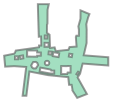

In [45]:
import shapely

geometry = shapely.from_wkt(
    "POLYGON ((18.83465924486518 18.32051929552108, 19.34909300506115 19.590621585957706, 21.88797490298748 19.574282886460423, 21.92662440240383 25.58028939552605, 21.399865701794624 29.031714636832476, 23.50779790431261 36.69280955661088, 23.573981944471598 45.18158556893468, 32.53619200363755 41.44733137637377, 31.20233740285039 38.089252636767924, 29.37461530417204 31.31616737600416, 29.752693705260754 26.086068406701088, 29.663249105215073 12.183275556191802, 26.770455703139305 -0.144303503446281, 51.5303654037416 -2.083181253634393, 51.54535440355539 -10.425297893583775, 25.687502205371857 -8.479356283321977, 23.082762002944946 -18.6954745631665, 20.58814410492778 -22.461137543432415, 30.01885560527444 -39.205858843401074, 20.18125330284238 -43.03550288360566, 15.357246603816748 -35.552251423709095, 15.430876795202494 -34.77413675375283, 14.570326302200556 -29.87461249344051, 11.965247824788094 -29.8633663803339, 11.188772104680538 -22.178186903707683, -9.110273897647858 -20.156618523411453, -28.026172697544098 -16.475477723404765, -31.06588539481163 -40.92581510357559, -34.83994489535689 -40.901487483642995, -31.221869096159935 -11.894575073383749, -42.19658439606428 -11.156461293809116, -43.4304156973958 -11.084705794230103, -52.46380799636245 -11.552668623626232, -53.46380799636245 -0.5526686236262321, -43.46380799636245 1.4473313689231873, -42.520086497068405 2.5265405867248774, -41.75165539607406 4.63489802647382, -18.330484494566917 7.931972056627274, -18.319018498063087 9.711529466323555, -15.985987197607756 9.6964978761971, -16.270320296287537 18.818940156139433, -18.536162197589874 18.611085096374154, -19.38412469625473 46.75696967635304, -19.463807996362448 51.44733137637377, -8.463807996362448 51.44733137637377, -9.71471018716693 45.804858786053956, -9.804981797933578 31.790843468159437, -10.293190594762564 30.57049175631255, -10.344775095582008 22.562483147718012, -7.68527864664793 20.609930960461497, -7.149235997349024 7.30380704626441, -2.5482083968818188 7.8303090166300535, -1.4060447961091995 4.041237256489694, 11.36633050441742 5.404952686280012, 12.482126902788877 8.178443896584213, 19.553420204669237 8.689065726473927, 18.83465924486518 18.32051929552108), (-12.768796097487211 8.452274976298213, -8.72029959782958 8.426195946522057, -8.694508794695139 12.430200156755745, -12.743001997470856 12.456279176287353, -12.768796097487211 8.452274976298213), (-8.769015595316887 0.8630769560113549, -5.820560995489359 0.510405246168375, -5.526745095849037 3.5116405859589577, -8.475914295762777 3.7530897865071893, -8.769015595316887 0.8630769560113549), (-4.526117995381355 -0.9438820034265518, 1.3686457052826881 -1.9828856540843844, 2.0798988044261932 1.9054777268320322, -3.8141439966857433 3.0557028967887163, -4.526117995381355 -0.9438820034265518), (11.734369102865458 -1.382260243408382, 14.681394502520561 -1.9573644939810038, 15.249672904610634 1.0421053459867835, 12.30193330347538 1.5059869261458516, 11.734369102865458 -1.382260243408382), (-37.07074749469757 -3.73730353359133, -34.11655619740486 -3.200213273987174, -34.577528797090054 -0.1941138235852122, -37.53171839565039 -0.7312038037925959, -37.07074749469757 -3.73730353359133), (-12.410838555544615 -13.377550918608904, -12.963807996362448 -13.252668622881174, -16.93940419703722 -12.559694253839552, -17.65067420527339 -16.448054883629084, -13.675791595131159 -17.25225214380771, -13.191440656781197 -17.376692436635494, -7.228039655834436 -18.41614838782698, -5.99739920720458 -18.529630973003805, -2.978165205568075 -18.549075523391366, -2.95882610604167 -15.546072483062744, -5.978058207780123 -15.526627942919731, -6.516777455806732 -14.527786328457296, -12.410838555544615 -13.377550918608904), (20.194324102252722 -19.677929633297026, 21.92554420232773 -17.24207770358771, 21.105695605278015 -16.680667153559625, 19.374475304037333 -19.11651879362762, 20.194324102252722 -19.677929633297026), (-12.509202998131514 16.792624296620488, -10.038938097655773 16.77671138662845, -10.018877796828747 19.890936916694045, -12.489141095429659 19.906849816441536, -12.509202998131514 16.792624296620488), (-30.331054996699095 -1.444983083754778, -20.244102995842695 -1.5099889831617475, -20.237653005868196 -0.5089879436418414, -19.9631781950593 -0.5107565335929394, -16.53224289789796 -0.5328625440597534, -16.51146189495921 2.692585226148367, -19.942395094782114 2.714691236615181, -20.216869685798883 2.7164598256349564, -20.203969694674015 4.718461886048317, -30.290909096598625 4.783467756584287, -30.331054996699095 -1.444983083754778), (-42.563116297125816 -4.146799533627927, -39.54389099776745 -4.166266613639891, -39.52452939748764 -1.1632635639980435, -42.543752897530794 -1.1437964932993054, -42.563116297125816 -4.146799533627927), (4.055388804525137 -11.009568203240633, 4.003828104585409 -19.01757636386901, 10.04229660332203 -19.056452253833413, 10.51558455452323 -17.522185122594237, 13.51558455452323 -17.52218512352556, 13.51558455452323 -14.52218512352556, 13.506176505237818 -13.962310123257339, 13.525506105273962 -10.95930703356862, 10.506276804953814 -10.939872093498707, 10.093847703188658 -11.04844407364726, 4.055388804525137 -11.009568203240633), (-8.954268086701632 -9.798623265698552, -8.20452630519867 -8.957076374441385, -7.947988096624613 -7.914647653698921, -8.23512801527977 -6.7996561601758, -8.908365525305271 -6.049914384260774, -10.197988096624613 -5.664647653698921, -11.524811316281557 -6.080516089685261, -12.213349685072899 -6.845558718778193, -12.447988096624613 -7.914647653698921, -12.060341157019138 -9.186589162796736, -11.356501936912537 -9.859826676547527, -10.197988096624613 -10.164647653698921, -8.954268086701632 -9.798623265698552), (-24.209050428122282 -6.931294208392501, -26.210401944816113 -10.30972245708108, -25.457599997520447 -12.255990905687213, -23.896913036704063 -13.41273536067456, -21.583424124866724 -13.394374337047338, -19.206436686217785 -10.065424509346485, -20.02273716777563 -7.794262293726206, -21.50998003780842 -6.80276704672724, -24.209050428122282 -6.931294208392501))"
)
geometry

In [46]:
geometry.bounds

(-53.46380799636245, -43.03550288360566, 51.54535440355539, 51.44733137637377)

In [47]:
xmin, ymin, xmax, ymax = geometry.bounds
offset = (-xmin, -ymin)
geometry = shapely.affinity.translate(geometry, offset[0], offset[1])
geometry.bounds

(0.0, 0.0, 105.00916239991784, 94.48283425997943)

In [51]:
point = shapely.Point(-4.6467332863896225, -0.30387085178668466)
point = shapely.affinity.translate(point, offset[0], offset[1])
point.y

42.731632031818975

In [56]:
offset[0]

53.46380799636245

In [55]:
exit_point = shapely.Point(18.536192003637552, -6.552668623626232)
exit_point = shapely.affinity.translate(exit_point, offset[0], offset[1])
exit_point.x

72.0

In [37]:
geometry.interiors

In [38]:
coords = geometry.exterior.coords[:]
holes_coords = [hole.coords[:] for hole in geometry.interiors]

In [39]:
line_segments = []

In [40]:
for start, end in zip(coords, coords[1:]):
    line_segments.append((start, end))

for hole_coords in holes_coords:
    for start, end in zip(hole_coords, hole_coords[1:]):
        line_segments.append((start, end))

len(line_segments)

140

In [41]:
# LINE GroundFloorLines[] = {
#     {10.0f, 10.0f, 14.0f, 10.0f},
#     {16.0f, 10.0f, 20.0f, 10.0f}, //{x1,y1,x2,y2} wall-by-wall on plan...
#     {20.0f, 10.0f, 20.0f, 15.0f},
#     {20.0f, 15.0f, 10.0f, 15.0f},
#     {10.0f, 15.0f, 10.0f, 10.0f}};

print(f"LINE GroundFloorLines[] = {{")

for line in line_segments[:-1]:
    print(f"    {{{line[0][0]}, {line[0][1]}, {line[1][0]}, {line[1][1]}}},")
print(
    f"    {{{line_segments[-1][0][0]}, {line_segments[-1][0][1]}, {line_segments[-1][1][0]}, {line_segments[-1][1][1]}}}"
)
print("};")
# print("test")

# for line_segment in line_segments:

LINE GroundFloorLines[] = {
    {72.29846724122763, 61.35602217912674, 72.8129010014236, 62.626124469563365},
    {72.8129010014236, 62.626124469563365, 75.35178289934993, 62.60978577006608},
    {75.35178289934993, 62.60978577006608, 75.39043239876628, 68.61579227913171},
    {75.39043239876628, 68.61579227913171, 74.86367369815707, 72.06721752043813},
    {74.86367369815707, 72.06721752043813, 76.97160590067506, 79.72831244021654},
    {76.97160590067506, 79.72831244021654, 77.03778994083405, 88.21708845254034},
    {77.03778994083405, 88.21708845254034, 86.0, 84.48283425997943},
    {86.0, 84.48283425997943, 84.66614539921284, 81.12475552037358},
    {84.66614539921284, 81.12475552037358, 82.83842330053449, 74.35167025960982},
    {82.83842330053449, 74.35167025960982, 83.2165017016232, 69.12157129030675},
    {83.2165017016232, 69.12157129030675, 83.12705710157752, 55.21877843979746},
    {83.12705710157752, 55.21877843979746, 80.23426369950175, 42.89119938015938},
    {80.23426369

In [16]:
line_segments[-1][0]

(-21.50998003780842, -6.80276704672724)

In [57]:
len(line_segments)

140